<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 1** 

- Python and Jupyter Notebook (previously IPython)
- Location, dispersion, shape
- PDF, CDF, moments
<hr/>

<h1><font color="darkblue">IPython/Jupyter Notebook</font></h1>
<hr/>

### Interactive Data Analysis

In [3]:
# Useful modules we'll always need
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


- This is what `%pylab` will do

```python
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *
```

In [6]:
# Generate data
N = 1000;
x = np.random.randn(N);

In [4]:
print (x[0])

-0.8893789473939157


In [5]:
# Indexing from 0
print ("%f, %f, ..., %f" % (x[0], x[1], x[N-1]))

# Last element
print ("%f = %f" % (x[N-1], x[-1]))

-0.889379, -0.622087, ..., 0.523280
0.523280 = 0.523280


In [6]:
[i*i for i in range(5)]

[0, 1, 4, 9, 16]

In [7]:
# Index out of bounds
for i in range(N-3,N+1):
    print ("%d : \t %r" % (i, x[i]))

997 : 	 0.7385135545832733
998 : 	 -0.5786153807233828
999 : 	 0.523279994915972


IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [8]:
# Error handling with exceptions
for i in range(N-3,N+5):
    try: 
        print ("%d : \t %r" % (i, x[i]))
    except IndexError as err: 
        print (err)

997 : 	 0.7385135545832733
998 : 	 -0.5786153807233828
999 : 	 0.523279994915972
index 1000 is out of bounds for axis 0 with size 1000
index 1001 is out of bounds for axis 0 with size 1000
index 1002 is out of bounds for axis 0 with size 1000
index 1003 is out of bounds for axis 0 with size 1000
index 1004 is out of bounds for axis 0 with size 1000


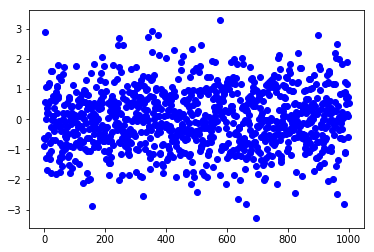

In [9]:
# Plot (Scatter)
plt.plot(x,'bo');

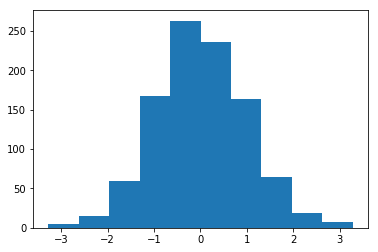

In [10]:
# Histogram
h = plt.hist(x,10)

### A Little Bit More
- [Markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)
- [Magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
- [Tips, Tricks, and Shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)

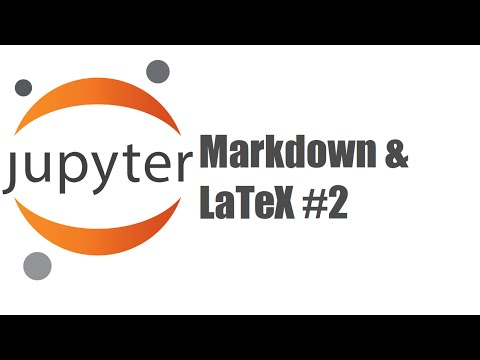

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('-F4WS8o-G2A', width=1000, height=600)

<h1><font color="darkblue">Descriptive Statistics</font></h1>
<hr/>

### Data Sets

- For example, a set of $N$ scalar measurements 

>$ \displaystyle \big\{x_i\big\}_{i=1}^N $

### How to characterize the data?
- Location
- Dispersion
- Shape?

### Location

- Mode 

> where it peaks
>
> unimodal vs multimodal

- Sample average

> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$
>
> but indexing starts with 0 in Python and most computer languages
>
> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=0}^{N-1} x_i$

- Median

> The number that separates the higher half of the set from the lower half


In [7]:
# Generate Data
N = 1000;
x = np.random.randn(N);

In [8]:
# Mean
avg = np.sum(x) / N 
avg, np.mean(x)

(0.020230143355783391, 0.020230143355783391)

In [9]:
# Median
med = np.median(x)
med

-0.032741664323915898

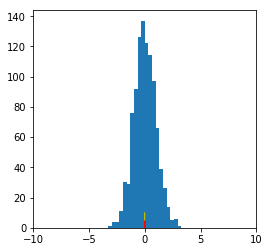

In [13]:
# Plot
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.hist(x,20)
ax.arrow(avg,0,0,5,color='r')
ax.arrow(med,5,0,5,color='y')
ax.set_xlim(-10, 10);

### Dispersion
- Sample variance

> $\displaystyle s^2 = \frac{1}{N\!-\!1} \sum_{i=1}^N \left(x_i - \bar{x}\right)^2$

- Standard deviation

> $\displaystyle s = \sqrt{s^2}$

#### Unhomework
0. Why is $(N\!-\!1)$ in the denominator above?

### Outliers
- What if just one element is too large, e.g., erroneously becomes $+\infty$
- Sample average $\bar{x} \rightarrow +\infty$
- Sample variance explodes, too

    **Ouch !!**


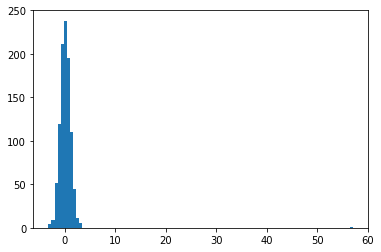

In [15]:
# Add one outlier and visulization
x[0] = 57
hist(x,100);

### Robustness
- Robust against outliers? What fraction can we tolerate?
- Median is more robust than the mean
- Median Absolute Deviation (MAD) for dispersion

In [16]:
# Add one outlier and compare the robustness of mean and median
x[0] = -1e9
print ('Average old vs new: %f %f' % (avg, mean(x)))
print ('Median  old vs new: %f %f' % (med, median(x)))

Average old vs new: 0.007529 -999999.991582
Median  old vs new: -0.015907 -0.015907
